# Classfication Exersice

### First Step : Download __[Titanic Data](https://www.kaggle.com/c/titanic/data)__  
- **NOTE** : use only  file `train.csv`from data.
#### 1. Import library of pandas and numpy

In [1]:
pip install scikit-plot

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#### 2. Load Data using Pandas

In [4]:
df = pd.read_csv('train.csv')

#### 3. Check column in Dataset and Drop useless columns 

- **Hint** : useless columns `Name`, `Ticket`,`PassengerId` and `Cabin`

In [5]:
df_copy = df.copy()

In [6]:
columns = df_copy[['Name','Ticket','PassengerId','Cabin']]

In [7]:
df_cleaned = df_copy.drop(columns, axis = 1)

In [8]:
df_cleaned.shape

(891, 8)

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### 4. Checking null values in each column and Handle with Mode

- **Hint** : 
- 1. for `Age` use Mode since there is outliers in this column
- 2. for `Embarked` use Mode since it is a categorical variable


In [10]:
df_cleaned['Age'].fillna(df_cleaned['Age'].mode()[0], inplace=True)

In [11]:
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

#### 5. Handle Categorical Data using `get_Dummies()` in pandas 

- **Hint** : Handle only columns `Sex` and `Embarked`
- 
 Read this document on how to use [`get_Dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)  

In [12]:
df_cleaned['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
emb_categ = pd.get_dummies(df_cleaned['Embarked'])

In [14]:
emb_categ

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [15]:
# merge dummies to original data frame
df_testing = pd.concat([df_cleaned,emb_categ], axis =1)
df_testing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [16]:
# convert sex column into binary variable where male = 1 , femal;e = 0
df_testing["Sex"] = np.where(df_testing["Sex"].str.contains("female"), 0, 1)

In [17]:
df_testing['Sex'].unique()

array([1, 0])

In [18]:
df_testing.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [19]:
df_final = df_testing[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S']]
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


#### 6.  Separate  X ( features ) from  Y (labels)
**Hint** : 
- goal : predict only passengers survive and or not be

In [20]:
X = df_final.iloc[:,1:]
y = df_final.iloc[:,:1]


#### 7. Split data into the Training data and Test data by `random_state=5` and `test_size=0.25`

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 5)

#### 8. Scale all Data using `StandardScaler` 

In [35]:
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)

# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

#### 9.Building your model ( LogisticRegression Model )
 Use the default sklearn parameters and `random_state=33`

In [36]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',random_state=33)
#Fitting
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=33, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### 10. Calculate Accuracy of the model
Hint: use `LogisticRegressionModel.score(X_test, y_test)`

In [37]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.7949101796407185
LogisticRegressionModel Test Score is :  0.820627802690583
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [29]


In [38]:
y_pred = LogisticRegressionModel.predict(X_test)

In [39]:
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:20])
print('Real Value is :  ' , list(y_test[:20] ) )

Predicted Value for LogisticRegressionModel is :  [0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0]
Real Value is :   ['Survived']


#### 11. Calculate Confusion Matrix ,precision,recall and f1-score for first model

In [40]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[125  15]
 [ 25  58]]


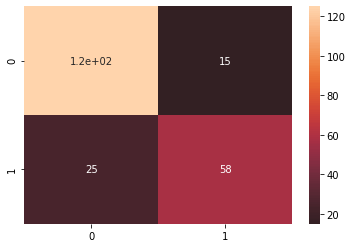

In [41]:
# drawing confusion matrix
import seaborn as sns
sns.heatmap(CM, center = True, annot=True)
plt.show()

In [42]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       140
           1       0.79      0.70      0.74        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



#### 12.Building your model ( K-NN Model )
 Use the default sklearn parameters with `n_neighbors= 5`

In [44]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute

KNNClassifierModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 13. Calculate Accuracy of the K-NN model
Hint: use `KNNClassifierModel.score(X_test, y_test))`

In [45]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8473053892215568
KNNClassifierModel Test Score is :  0.8430493273542601


#### 14. Calculate Confusion Matrix ,precision,recall and F1-score for the K-NN model

In [50]:
#Calculating Prediction
y_pred_Knn = KNNClassifierModel.predict(X_test)
y_pred_prob_knn = KNNClassifierModel.predict_proba(X_test)

In [54]:
CM_Knn = confusion_matrix(y_test, y_pred_Knn)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[126  14]
 [ 21  62]]


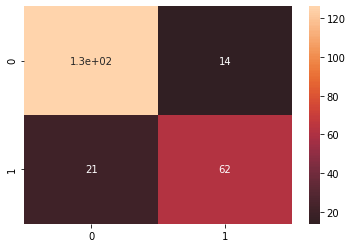

In [55]:
sns.heatmap(CM_Knn, center = True, annot=True)
plt.show()

In [52]:
ClassificationReport = classification_report(y_test,y_pred_Knn)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       140
           1       0.82      0.75      0.78        83

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



#### Hint : use for loop to Calculate score of the K-NN model at different K values

In [56]:
k_range = range(1,26)
scores = []

In [57]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
    
print(scores)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum

[0.8071748878923767, 0.8026905829596412, 0.8340807174887892, 0.8161434977578476, 0.8430493273542601, 0.8385650224215246, 0.8385650224215246, 0.8340807174887892, 0.8385650224215246, 0.8385650224215246, 0.8430493273542601, 0.8565022421524664, 0.8475336322869955, 0.8609865470852018, 0.8654708520179372, 0.8565022421524664, 0.8699551569506726, 0.8565022421524664, 0.8475336322869955, 0.8654708520179372, 0.8565022421524664, 0.852017937219731, 0.8385650224215246, 0.8475336322869955, 0.8475336322869955]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum

Text(0, 0.5, 'testing accuracy')

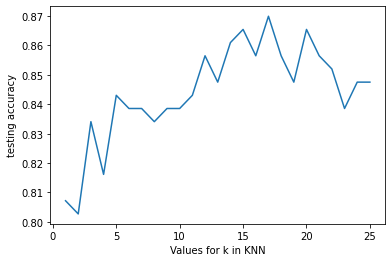

In [58]:
plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')